# # Minimos Cuadrados: Caso Potencial.

 El caso potencial de minimos cuadrados sigue los mismos estandares de ecuaciones que el caso descreto, sin embargo, al caso potencial se le aplica logaritmo natural tanto a la nuve de puntos en "Y" como a las matrices en "X".
 
 Ecuaciones:
 
 n: Numero de funciones-menos la unidad.
 
 m: Numero de nodos menos la unidad.
 
 
 $$y = cx^{k}$$
 
 
 $$ln(y) = ln(cx^{k})$$
 
 
 $$ln(y) = ln(c)+k \ ln(x), \ c_0 = ln(c), \ c_1 = k$$
 
 
 $$ln(y) = c_0 + c_1ln(x)$$
 
 
 $$A = \sum_{i=0}^{m}ln(\begin{bmatrix}1 & x_i \\ x_1 & x_i^{2} \end{bmatrix})$$
 
 
 $$b_{\ nx1} = \sum_{i=0}^{m}ln(\begin{bmatrix}1 \\ x_1 \end{bmatrix})ln(f(x_i))$$
 
 
 $$y = cx^{k}$$
 
 
 $$c = e^{c_0}$$
 
 
 $$k = c_1$$
 
 
 $$y = e^{c_0}x^{c_1}$$

In [1]:
from ipywidgets import widgets 
from IPython.display import display, Math, Latex
from IPython.core.display import display, HTML
from sympy import *
from numpy import * 
import matplotlib.pyplot as plt

init_printing()
     
import numpy as np
import sympy as sp

init_printing()

In [2]:
print("Ingrese los valores en x:")
text_x=widgets.Text();
display(text_x)
print("Ingrese los valores en y:")
text_y=widgets.Text()
display(text_y)

Ingrese los valores en x:


Text(value='')

Ingrese los valores en y:


Text(value='')

In [3]:
xi = text_x.value.split(",")
xi = set(xi)
yi= text_y.value.split(",")
if len(xi)==len(yi):
    try:
        xi = list(map(float, xi))
        yi = list(map(float, yi))
        xi = sorted(xi)
    except:
        display(HTML("<h3 style='color:red'>Error en los datos, porfavor verificar que sean valores numericos.</h3>"))
else:
    display(HTML("<h3 style='color:red'>Error en los datos, porfavor verificar logitud de valores.</h3>"))

In [11]:
if len(xi)==len(yi):
    x = Symbol('x')
    e = Symbol('e')
    rs = Function('rs')(x)
    mf = Function('mf')(x)
    mft = Function('mft')(x)
    px = Function('px')(x)
    wizzard = [0]*(2)
    for i in range(0,2):
        wizzard[i]=x**i
    mf = Matrix([wizzard])

    mft=mf.T

    #print(mft)
    rs=mft*mf
    display(HTML("<h3>Matris de funciones base: </h3>"))
    display(rs)

    a = zeros(shape=(2,2))
    for i in range(0,len(xi)):
        a = a + rs.subs(x,np.float(ln(xi[i])))

    b = zeros(shape=(2,1))
    for i in range(0,len(xi)):
        b = b + mft.subs(x,np.float(ln(xi[i])))*np.float(ln(yi[i]))
        
    display(HTML("<h3>Matris de coeficientes: </h3>"))
    c = (a.inv()*b)
    display(c)


    final = [0]*(2)
    px=0
    for i in range(0,1):
        final[i]= np.float(c[i])
        final[i] = np.exp(final[i])*(x**(np.float(c[i-1])))

        px = px+final[i]
    display(HTML("<h3>Función Potencial:</h3>"))
    display(Math("P(x)="+latex(px)))
else:
    display(HTML("<h3 style='color:red'>Error en los datos, porfavor verificar longuitud de los datos en x y.</h3>"))

⎡1  x ⎤
⎢     ⎥
⎢    2⎥
⎣x  x ⎦

⎡0.211265174121523⎤
⎢                 ⎥
⎣2.16554024699874 ⎦

<IPython.core.display.Math object>

In [13]:
print("Evaluar polinomio en un punto")
text_value = widgets.BoundedFloatText(
    value=0.0,
    step=0.1,
    description='x:',
    disabled=False
)
display(text_value)

Evaluar polinomio en un punto


BoundedFloatText(value=0.0, description='x:', step=0.1)

In [16]:
if(text_value != ""):
    display(Math("P("+latex(text_value.value)+")="+latex(px.subs(x,text_value.value))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

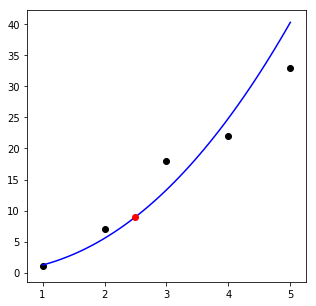

In [17]:
if len(xi)==len(yi):
    try:
        display(HTML("<h3>Grafica del polinomio:</h3>"))
        display(Math("P(x)="+latex(px)))
        fig,ax = plt.subplots(figsize=(5,5))
        f_l = lambdify(x,px)
        xv = linspace(xi[0],xi[len(xi)-1],50)
        ax.plot(xv, f_l(xv),color='blue');
        ax.scatter(xi,yi,color='black', marker='o');
        ax.plot(text_value.value,px.subs(x,text_value.value), color ='red',marker='o');

    except:
        display(HTML("<h2 style='color:red'>Algo ocurrio mal, porfavor verifica los datos introducidos</h2>"))
else:
    display(HTML("<h3 style='color:red'>Error en los datos, porfavor verificar longuitud de los datos en x y.</h3>"))